In [1]:
import pandas as pd
import numpy as np

In [2]:
arra=pd.read_csv('arra.csv')

In [3]:
arra.head()

age  sex  height  weight  qrs_duration  p-r_interval  q-t_interval  \
0   75    0     190      80            91           193           371   
1   56    1     165      64            81           174           401   
2   54    0     172      95           138           163           386   
3   55    0     175      94           100           202           380   
4   75    0     190      80            88           181           360   

   t_interval  p_interval  qrs  ...   KY    KZ   LA   LB LC   LD   LE    LF  \
0         174         121  -16  ...  0.0   9.0 -0.9  0.0  0  0.9  2.9  23.3   
1         149          39   25  ...  0.0   8.5  0.0  0.0  0  0.2  2.1  20.4   
2         185         102   96  ...  0.0   9.5 -2.4  0.0  0  0.3  3.4  12.3   
3         179         143   28  ...  0.0  12.2 -2.2  0.0  0  0.4  2.6  34.6   
4         177         103  -16  ...  0.0  13.1 -3.6  0.0  0 -0.1  3.9  25.4   

     LG  diagnosis  
0  49.4          8  
1  38.8          6  
2  49.0         10  
3  61.6          1  
4  62.8          7  

[5 rows x 280 columns]

In [4]:
arra.isnull().sum()

age             0
sex             0
height          0
weight          0
qrs_duration    0
               ..
LD              0
LE              0
LF              0
LG              0
diagnosis       0
Length: 280, dtype: int64

In [5]:
arras=arra.copy()

In [6]:
#from dataset description it is identified that naull values represented as ?
arras.replace({"?":np.nan},inplace=True)

In [7]:
arras['J'].isnull().sum()

376

In [8]:
arras['diagnosis'].value_counts()

1     245
10     50
2      44
6      25
16     22
4      15
3      15
5      13
9       9
15      5
14      4
7       3
8       2
Name: diagnosis, dtype: int64

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

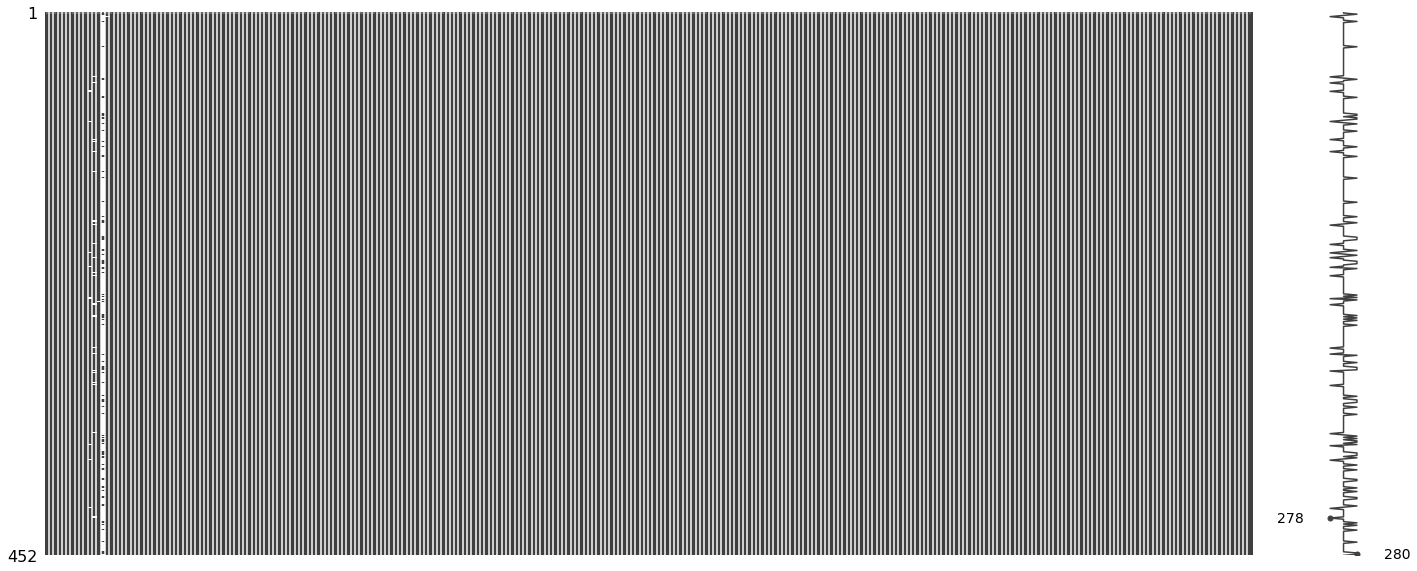

In [10]:
import missingno as msno
msno.matrix(arras) 
msno.bar(arras)

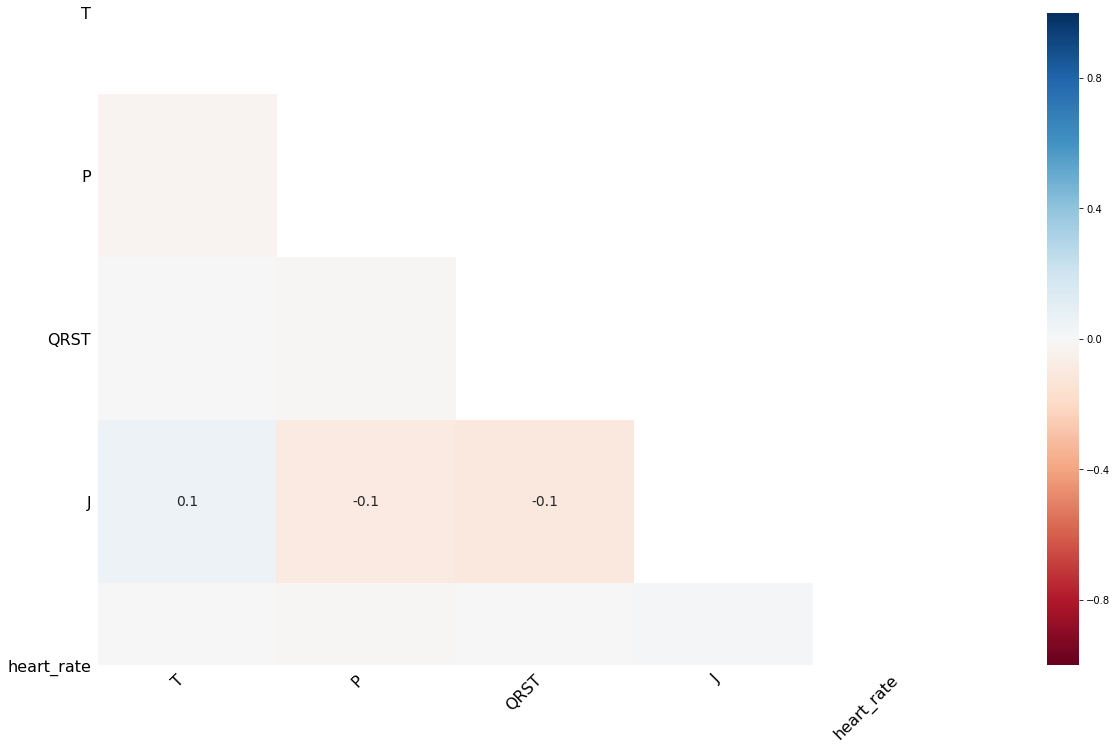

In [11]:
msno.heatmap(arras)

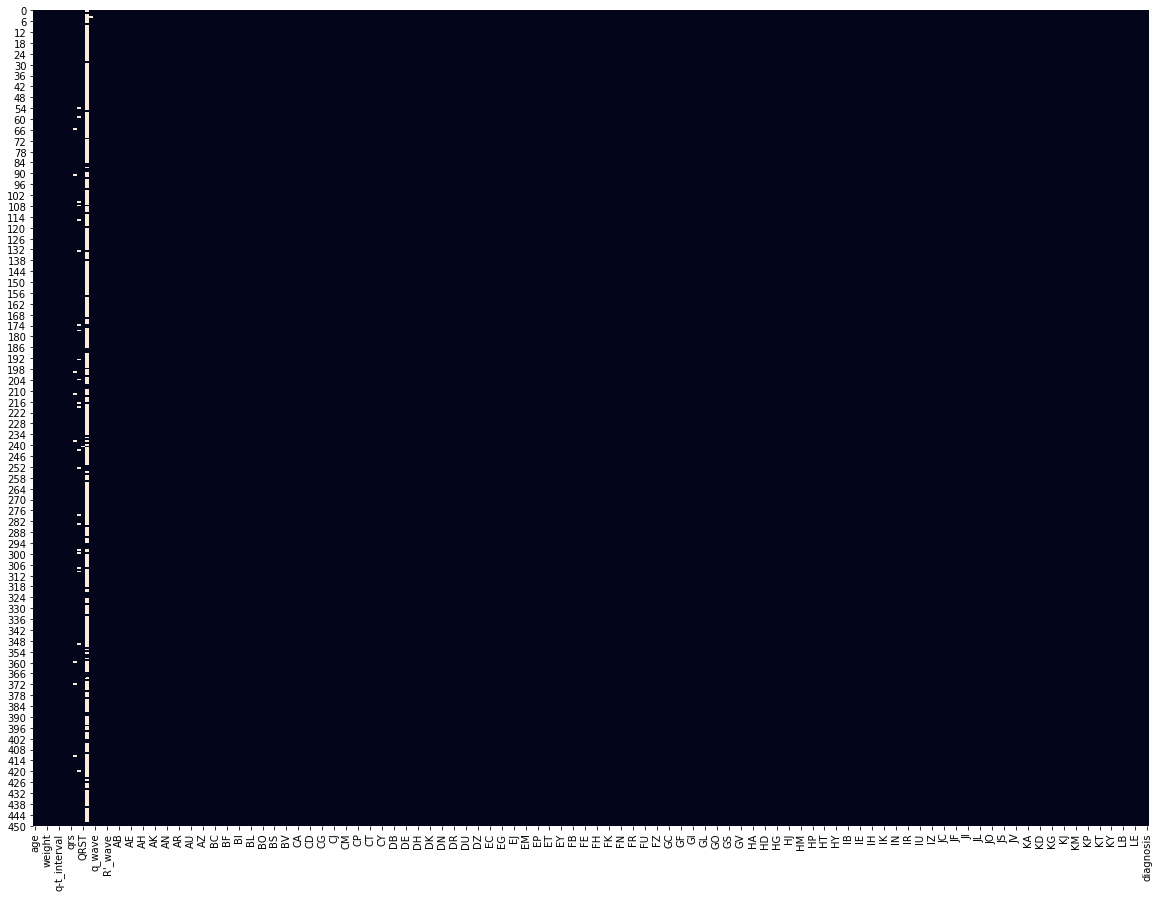

In [12]:
plt.subplots(figsize=(20,15))

sns.heatmap(arras.isnull(), cbar=False)

In [13]:
arras.fillna(arras.median(),inplace = True)

In [14]:
sns.heatmap(arras.isnull(), cbar=False)

In [15]:
arras['J'].isnull().sum()

0

In [16]:
arras.describe()

age         sex      height      weight  qrs_duration  \
count  452.000000  452.000000  452.000000  452.000000    452.000000   
mean    46.471239    0.550885  166.188053   68.170354     88.920354   
std     16.466631    0.497955   37.170340   16.590803     15.364394   
min      0.000000    0.000000  105.000000    6.000000     55.000000   
25%     36.000000    0.000000  160.000000   59.000000     80.000000   
50%     47.000000    1.000000  164.000000   68.000000     86.000000   
75%     58.000000    1.000000  170.000000   79.000000     94.000000   
max     83.000000    1.000000  780.000000  176.000000    188.000000   

       p-r_interval  q-t_interval  t_interval  p_interval         qrs  ...  \
count    452.000000    452.000000  452.000000  452.000000  452.000000  ...   
mean     155.152655    367.207965  169.949115   90.004425   33.676991  ...   
std       44.842283     33.385421   35.633072   25.826643   45.431434  ...   
min        0.000000    232.000000  108.000000    0.000000 -172.000000  ...   
25%      142.000000    350.000000  148.000000   79.000000    3.750000  ...   
50%      157.000000    367.000000  162.000000   91.000000   40.000000  ...   
75%      175.000000    384.000000  179.000000  102.000000   66.000000  ...   
max      524.000000    509.000000  381.000000  205.000000  169.000000  ...   

               KY          KZ          LA          LB     LC          LD  \
count  452.000000  452.000000  452.000000  452.000000  452.0  452.000000   
mean    -0.278982    9.048009   -1.457301    0.003982    0.0    0.514823   
std      0.548876    3.472862    2.002430    0.050118    0.0    0.347531   
min     -4.100000    0.000000  -28.600000    0.000000    0.0   -0.800000   
25%     -0.425000    6.600000   -2.100000    0.000000    0.0    0.400000   
50%      0.000000    8.800000   -1.100000    0.000000    0.0    0.500000   
75%      0.000000   11.200000    0.000000    0.000000    0.0    0.700000   
max      0.000000   23.600000    0.000000    0.800000    0.0    2.400000   

               LE          LF          LG   diagnosis  
count  452.000000  452.000000  452.000000  452.000000  
mean     1.222345   19.326106   29.473230    3.880531  
std      1.426052   13.503922   18.493927    4.407097  
min     -6.000000  -44.200000  -38.600000    1.000000  
25%      0.500000   11.450000   17.550000    1.000000  
50%      1.350000   18.100000   27.900000    1.000000  
75%      2.100000   25.825000   41.125000    6.000000  
max      6.000000   88.800000  115.900000   16.000000  

[8 rows x 275 columns]

In [17]:
Y = arras[['diagnosis']]
X = arras.drop(['diagnosis'], axis=1)

In [23]:
from sklearn.ensemble import ExtraTreesClassifier 
import matplotlib.pyplot as plt 
model = ExtraTreesClassifier() 
model.fit(X,Y)
print(model.feature_importances_) 
#use inbuilt class feature_importances of tree based classifiers 
#plot graph of feature importances for better visualization 
feat_importances = pd.Series(model.feature_importances_, index=X.columns) 
feat_importances.nlargest(12).plot(kind='barh') 
plt.show()

C:\Users\ghost\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[5.33880302e-03 6.09250384e-03 4.82039608e-03 4.86582639e-03
 9.36141903e-03 4.45639266e-03 7.87004964e-03 7.87559229e-03
 4.86358218e-03 4.84922871e-03 8.64409109e-03 3.95758746e-03
 4.31355021e-03 3.93709367e-03 2.02372852e-02 2.59433227e-03
 5.87244624e-03 5.30950718e-03 3.14795810e-04 0.00000000e+00
 4.83179039e-03 2.00136955e-04 1.13318192e-04 3.81834046e-04
 9.98698818e-04 2.01440561e-04 3.20296708e-04 3.57644361e-03
 5.72406251e-03 5.35917196e-03 7.34324150e-04 1.98680025e-04
 5.88831611e-03 7.23029161e-04 3.62717933e-03 1.99386288e-04
 0.00000000e+00 2.83905880e-05 5.12108548e-04 6.88202477e-03
 3.02155639e-03 3.26705251e-03 2.01749423e-03 1.06464705e-04
 4.81651755e-03 0.00000000e+00 9.88833201e-04 0.00000000e+00
 5.71327850e-04 2.26440465e-04 5.12782192e-04 3.98378637e-03
 4.28515761e-03 1.80864792e-03 1.40457394e-03 0.00000000e+00
 3.51087163e-03 1.27638755e-04 1.27246471e-04 0.00000000e+00
 1.24121268e-03 4.36778277e-05 3.16719987e-04 3.01442543e-03
 5.75785416e-03 4.371670

In [24]:
xnew=arras[['GJ','GU','KH','LE','DZ','KS','HR','DN','IV','DD','heart_rate','DB','diagnosis']]

In [25]:
Xn=xnew.drop(['diagnosis'], axis=1)
Yn=xnew[['diagnosis']]

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Xn, Yn, test_size=0.3, random_state=365)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
lr.score(X_test,Y_test)

C:\Users\ghost\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6544117647058824

In [35]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 

In [38]:
kfold = KFold(n_splits=7, random_state=7) 
model = LogisticRegression() 
scoring = 'accuracy'
results = cross_val_score(model, Xn, Yn, cv=kfold, scoring=scoring)
print("Accuracy:",results.mean(), results.std()) 


C:\Users\ghost\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\ghost\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ghost\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Accuracy: 0.685989010989011 0.04354720582735618


In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_lr = LogisticRegression()
model_lr.fit(X_train, Y_train)

predictions = model_lr.predict(X_test)
score = model_lr.score(X_test, Y_test)

print("Accuracy = " + str(score))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

Accuracy = 0.6544117647058824
[[64  5  0  0  0  0  0  0  0  1  0  0  0]
 [ 3  9  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  2  1]
 [ 4  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  1  0  0  0  2  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  0  0  0  1  0  0  1  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  7  0  0  0]
 [ 2  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  1  0  0  0]]
              precision    recall  f1-score   support

           1       0.70      0.91      0.80        70
           2       0.45      0.69      0.55        13
           3       1.00      0.62      0.77         8
           4       0.00      0.00      0.00         5
           5       1.00      0.50      0.67         4
           6       0.50      0.11      0.18         9
           7       0.00      0.00      0.00 

C:\Users\ghost\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ghost\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
